In [1]:
from IPython.display import Image 

In [3]:
import _init_paths
from ocean_lib.ocean.ocean import Ocean
from ocean_lib.config import Config

config = Config('config.ini')
ocean = Ocean(config)

print(f"config.network_url = '{config.network_url}'")
print(f"config.block_confirmations = {config.block_confirmations.value}")
print(f"config.metadata_cache_uri = '{config.metadata_cache_uri}'")
print(f"config.provider_url = '{config.provider_url}'")

config.network_url = 'https://rinkeby.infura.io/v3/d163c48816434b0bbb3ac3925d6c6c80'
config.block_confirmations = 0
config.metadata_cache_uri = 'https://aquarius.oceanprotocol.com'
config.provider_url = 'https://provider.rinkeby.oceanprotocol.com'


In [5]:
import os
from ocean_lib.web3_internal.wallet import Wallet

wallet = Wallet(ocean.web3, os.getenv('MY_TEST_KEY'), transaction_timeout=20, block_confirmations=config.block_confirmations)

print(f"public address = '{wallet.address}'")

public address = '0x2338e4e94AEe1817701F65f2c751f7c844b0e43b'


In [7]:
publisher_wallet = Wallet(ocean.web3, os.getenv('MY_TEST_KEY'), transaction_timeout=20, block_confirmations=config.block_confirmations)

In [8]:
DATA_ddo = ocean.assets.resolve("did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281")

print(f"Data token info = '{DATA_ddo.values['dataTokenInfo']}'")
print(f"Dataset name = '{DATA_ddo.metadata['main']['name']}'")

Data token info = '{'address': '0xC9D0568838fa670baEe7195Ea443b32EfCAc2281', 'name': 'Powerful Shark Token', 'symbol': 'POWSHA-38', 'decimals': 18, 'cap': 1000.0}'
Dataset name = 'CryptoPunks Images'


In [9]:
ALG_ddo = ocean.assets.resolve("did:op:E2e123115d5758Dd4C6F434E1c142e72ed8B2820")

print(f"Alg token info = '{ALG_ddo.values['dataTokenInfo']}'")
print(f"Alg name = '{ALG_ddo.metadata['main']['name']}'")

Alg token info = '{'address': '0xE2e123115d5758Dd4C6F434E1c142e72ed8B2820', 'name': 'ARTGEN0', 'symbol': 'ARTGEN0', 'decimals': 18, 'cap': 1000.0}'
Alg name = 'Generative Algorithm: DCGAN'


In [11]:
from ocean_lib.assets.trusted_algorithms import add_publisher_trusted_algorithm
add_publisher_trusted_algorithm(DATA_ddo, ALG_ddo.did, config.metadata_cache_uri)
ocean.assets.update(DATA_ddo, publisher_wallet=publisher_wallet)

'0xc3bdad0374fbd5d8586d150b93e1c94c07c0227a05956606ccbf313759305611'

After your algorithm is approved for a dataset, it should be displayed on the page for the dataset, as shown in the image below. Be aware, it might take a while to appear.

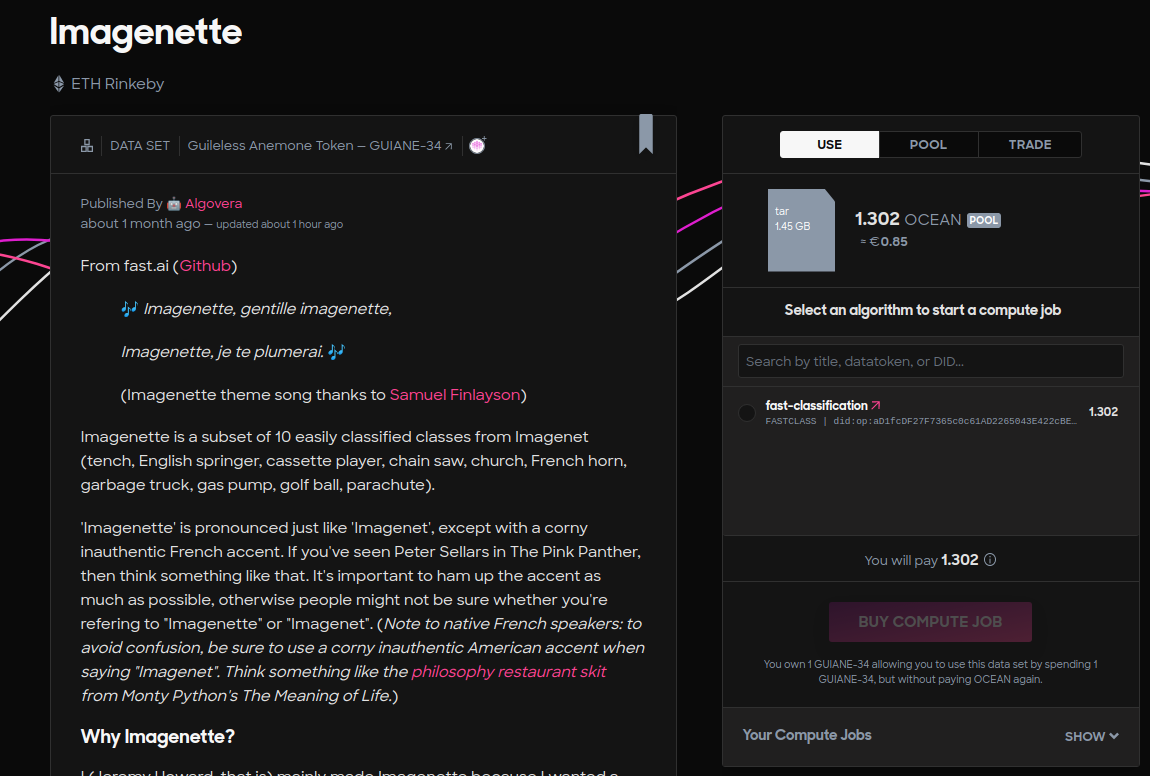

In [4]:
display(Image(filename='images/algo-approved.png', width = 800))